In [4]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action="ignore")

In [5]:
#importing the dataset
df=pd.read_csv('loan.csv')

## Data Understanding
##### There seem to be a lot of columns in the dataset, it would be best to categorise the columns before proceeding ahead

In [6]:
#Checking the first few rows to confirm import and get a hint of the structure
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [7]:
#checking the dimensions
df.shape

(39717, 111)

In [8]:
# Checking the distribution of the numerical 
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


###### This doesn't tell much but it can seen that Outliers exists for several columns, for example loan_amount could have a lot of outliers

In [9]:
#checking the dataframe size, and basic info like number of columns, counts of column datatypes
print(df.size)
print("------------")
print(df.info())

4408587
------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None


In [10]:
#Check the datatypes of the columns
for i in df.columns:
    print(i,":",df[i].dtype)

id : int64
member_id : int64
loan_amnt : int64
funded_amnt : int64
funded_amnt_inv : float64
term : object
int_rate : object
installment : float64
grade : object
sub_grade : object
emp_title : object
emp_length : object
home_ownership : object
annual_inc : float64
verification_status : object
issue_d : object
loan_status : object
pymnt_plan : object
url : object
desc : object
purpose : object
title : object
zip_code : object
addr_state : object
dti : float64
delinq_2yrs : int64
earliest_cr_line : object
inq_last_6mths : int64
mths_since_last_delinq : float64
mths_since_last_record : float64
open_acc : int64
pub_rec : int64
revol_bal : int64
revol_util : object
total_acc : int64
initial_list_status : object
out_prncp : float64
out_prncp_inv : float64
total_pymnt : float64
total_pymnt_inv : float64
total_rec_prncp : float64
total_rec_int : float64
total_rec_late_fee : float64
recoveries : float64
collection_recovery_fee : float64
last_pymnt_d : object
last_pymnt_amnt : float64
next_pymnt

In [11]:
# Understanding the types of columns by looking at the unique values in each column
for i in df.columns:
    print(i,df[i].nunique())

id 39717
member_id 39717
loan_amnt 885
funded_amnt 1041
funded_amnt_inv 8205
term 2
int_rate 371
installment 15383
grade 7
sub_grade 35
emp_title 28820
emp_length 11
home_ownership 5
annual_inc 5318
verification_status 3
issue_d 55
loan_status 3
pymnt_plan 1
url 39717
desc 26527
purpose 14
title 19615
zip_code 823
addr_state 50
dti 2868
delinq_2yrs 11
earliest_cr_line 526
inq_last_6mths 9
mths_since_last_delinq 95
mths_since_last_record 111
open_acc 40
pub_rec 5
revol_bal 21711
revol_util 1089
total_acc 82
initial_list_status 1
out_prncp 1137
out_prncp_inv 1138
total_pymnt 37850
total_pymnt_inv 37518
total_rec_prncp 7976
total_rec_int 35148
total_rec_late_fee 1356
recoveries 4040
collection_recovery_fee 2616
last_pymnt_d 101
last_pymnt_amnt 34930
next_pymnt_d 2
last_credit_pull_d 106
collections_12_mths_ex_med 1
mths_since_last_major_derog 0
policy_code 1
application_type 1
annual_inc_joint 0
dti_joint 0
verification_status_joint 0
acc_now_delinq 1
tot_coll_amt 0
tot_cur_bal 0
open_acc

## Data Cleaning

In [12]:
# Find the null rows percent for all columns

In [13]:
for i in df.columns:
    print(i,df[i].isnull().sum()*100/df.shape[0])

id 0.0
member_id 0.0
loan_amnt 0.0
funded_amnt 0.0
funded_amnt_inv 0.0
term 0.0
int_rate 0.0
installment 0.0
grade 0.0
sub_grade 0.0
emp_title 6.191303472064859
emp_length 2.7066495455346575
home_ownership 0.0
annual_inc 0.0
verification_status 0.0
issue_d 0.0
loan_status 0.0
pymnt_plan 0.0
url 0.0
desc 32.58050708764509
purpose 0.0
title 0.027695948838029054
zip_code 0.0
addr_state 0.0
dti 0.0
delinq_2yrs 0.0
earliest_cr_line 0.0
inq_last_6mths 0.0
mths_since_last_delinq 64.66248709620565
mths_since_last_record 92.98537150338646
open_acc 0.0
pub_rec 0.0
revol_bal 0.0
revol_util 0.12589067653649572
total_acc 0.0
initial_list_status 0.0
out_prncp 0.0
out_prncp_inv 0.0
total_pymnt 0.0
total_pymnt_inv 0.0
total_rec_prncp 0.0
total_rec_int 0.0
total_rec_late_fee 0.0
recoveries 0.0
collection_recovery_fee 0.0
last_pymnt_d 0.1787647606818239
last_pymnt_amnt 0.0
next_pymnt_d 97.1296925749679
last_credit_pull_d 0.0050356270614598285
collections_12_mths_ex_med 0.1409975577208752
mths_since_last

In [14]:
# there are columns with 100% null values, but let us drop columns with more than 85% null values
nullValCols=df.columns[(df.isnull().sum()/df.shape[0])*100>85.0]



In [15]:
#total number of rows in the dataset
df.shape[0]

39717

In [16]:
#Here is the detail of these columns
len(nullValCols),nullValCols

(56,
 Index(['mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog',
        'annual_inc_joint', 'dti_joint', 'verification_status_joint',
        'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m',
        'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
        'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
        'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
        'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
        'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
        'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc',
        'mths_since_recent_bc_dlq', 'mths_since_recent_inq',
        'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd',
        'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl',
        'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0',
        'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num

In [17]:
# let us pick fewcolumsn from the above detail and see what kind of values do they have 
print(df["mths_since_last_record"].nunique(),"\n",df["mths_since_last_record"].unique())

111 
 [ nan 113. 105.  97.  33.  93.  52.  85.  90.  91. 114.  92. 117.  87.
  45.  83. 118.  38. 101. 100. 112. 110.  88.  79.  77. 107. 102.  98.
  95. 103.  96. 116. 111.  89. 108.  29. 106. 115.  53.  86.  57.  63.
  94. 109.  99. 104.  76.  61.  28.  23.  75.  47.  82.  21.  62.  44.
  80.  67. 119.  42.  34.  66.  58.  22.  56.  72.  64.  50.  69.  49.
  74.  35.  12.  26.  78.  54.  37.  73.  11.  31.  59.  32.  81.  68.
  55.  39.  51.  70.  30.  41.  71.  40.  43.  27.  65.  46.  19.  17.
  25.  13.  48.  36.   7.  60.  14.   6.  18.   0.  20. 120. 129.   5.]


In [18]:
print(df["mths_since_last_delinq"].nunique(),"\n",df["mths_since_last_delinq"].unique())

95 
 [ nan  35.  38.  61.   8.  20.  18.  68.  45.  48.  41.  40.  74.  25.
  53.  39.  10.  26.  56.  77.  28.  52.  24.  16.  60.  54.  23.   9.
  11.  13.  65.  19.  80.  22.  59.  79.  44.  64.  57.  14.  63.  49.
  15.  73.  70.  29.  51.   5.  75.  55.   2.  30.  47.  33.  69.   4.
  43.  21.  27.  46.  81.  78.  82.  31.  76.  62.  72.  42.  50.   3.
  12.  67.  36.  34.  58.  17.  71.  66.  32.   6.  37.   7.   1.  83.
  86. 115.  96. 103. 120. 106.  89. 107.  85.  97.  95.   0.]


In [19]:
print(df["desc"].nunique())

26527


#### its evident that there are several columns with null values. It is best to drop the columns with null values >70%


In [20]:
#get the columns where the null values are more than 70% of the total values or rows
colsToDrop=df.columns[((df.isnull().sum())/df.shape[0])*100>70.0]


In [21]:
#Let us check how many columns do we have 
len(colsToDrop)

56

#### This is a massive drop in the number of columns!

In [22]:
#Dropping these columns from our dataset
df=df.drop(colsToDrop,axis=1)

In [23]:
#confirm the operation by checking the shape of the dataframe
df.shape

(39717, 55)

In [24]:
#Let us again check the columns against the number of unique values they have
for i in df.columns:
    print(i,"\t",df[i].nunique())

id 	 39717
member_id 	 39717
loan_amnt 	 885
funded_amnt 	 1041
funded_amnt_inv 	 8205
term 	 2
int_rate 	 371
installment 	 15383
grade 	 7
sub_grade 	 35
emp_title 	 28820
emp_length 	 11
home_ownership 	 5
annual_inc 	 5318
verification_status 	 3
issue_d 	 55
loan_status 	 3
pymnt_plan 	 1
url 	 39717
desc 	 26527
purpose 	 14
title 	 19615
zip_code 	 823
addr_state 	 50
dti 	 2868
delinq_2yrs 	 11
earliest_cr_line 	 526
inq_last_6mths 	 9
mths_since_last_delinq 	 95
open_acc 	 40
pub_rec 	 5
revol_bal 	 21711
revol_util 	 1089
total_acc 	 82
initial_list_status 	 1
out_prncp 	 1137
out_prncp_inv 	 1138
total_pymnt 	 37850
total_pymnt_inv 	 37518
total_rec_prncp 	 7976
total_rec_int 	 35148
total_rec_late_fee 	 1356
recoveries 	 4040
collection_recovery_fee 	 2616
last_pymnt_d 	 101
last_pymnt_amnt 	 34930
last_credit_pull_d 	 106
collections_12_mths_ex_med 	 1
policy_code 	 1
application_type 	 1
acc_now_delinq 	 1
chargeoff_within_12_mths 	 1
delinq_amnt 	 1
pub_rec_bankruptcies 

In [25]:
#There are some columns that have 1 value through out the dataset, let us also remove them
singleValCols=df.columns[df.nunique()==1]


In [26]:
len(singleValCols),singleValCols

(9,
 Index(['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med',
        'policy_code', 'application_type', 'acc_now_delinq',
        'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens'],
       dtype='object'))

In [27]:
# now let us drop these single Valued columns as well
df=df.drop(singleValCols,axis=1)

In [28]:
# Confirming execution by re-cheking shape
df.shape

(39717, 46)

In [29]:
#Let us again check the columns against the number of unique values they have
for i in df.columns:
    print(i,"\t",df[i].nunique())

id 	 39717
member_id 	 39717
loan_amnt 	 885
funded_amnt 	 1041
funded_amnt_inv 	 8205
term 	 2
int_rate 	 371
installment 	 15383
grade 	 7
sub_grade 	 35
emp_title 	 28820
emp_length 	 11
home_ownership 	 5
annual_inc 	 5318
verification_status 	 3
issue_d 	 55
loan_status 	 3
url 	 39717
desc 	 26527
purpose 	 14
title 	 19615
zip_code 	 823
addr_state 	 50
dti 	 2868
delinq_2yrs 	 11
earliest_cr_line 	 526
inq_last_6mths 	 9
mths_since_last_delinq 	 95
open_acc 	 40
pub_rec 	 5
revol_bal 	 21711
revol_util 	 1089
total_acc 	 82
out_prncp 	 1137
out_prncp_inv 	 1138
total_pymnt 	 37850
total_pymnt_inv 	 37518
total_rec_prncp 	 7976
total_rec_int 	 35148
total_rec_late_fee 	 1356
recoveries 	 4040
collection_recovery_fee 	 2616
last_pymnt_d 	 101
last_pymnt_amnt 	 34930
last_credit_pull_d 	 106
pub_rec_bankruptcies 	 3


In [30]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0


In [31]:
#let us remove the Behavioral data as it is of no signifance to draw conclusions for New Loan Applicants
# Based on the Data Undersatnding the behavioral columns are as follow:
behavioralCols=['delinq_2yrs','earliest_cr_line','open_acc','revol_bal',
                'revol_util','total_acc','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d']

In [32]:
print(behavioralCols)

['delinq_2yrs', 'earliest_cr_line', 'open_acc', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d']


In [33]:
# Dropping these behavioral columns
df=df.drop(behavioralCols,axis=1)

In [34]:
print(df.shape,"\n")
df.head()

(39717, 28) 



,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,desc,purpose,title,zip_code,addr_state,dti,inq_last_6mths,mths_since_last_delinq,pub_rec,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,1,NaN,0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,5,NaN,0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,small_business,real estate business,606xx,IL,8.72,2,NaN,0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,1,35.0,0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,38.0,0,0.0


###### The Desc column has a lot of unique string values, it could be used for sentiment analysis and data modeling but those processes are currently out of scope of this Project, hence this column could be dropped as well, similarly the url col is of no significance in drawing any inference

In [35]:
df=df.drop(['desc','url'],axis=1)

In [36]:
for i in df.columns:
    print(i,"\t",df[i].nunique())

id 	 39717
member_id 	 39717
loan_amnt 	 885
funded_amnt 	 1041
funded_amnt_inv 	 8205
term 	 2
int_rate 	 371
installment 	 15383
grade 	 7
sub_grade 	 35
emp_title 	 28820
emp_length 	 11
home_ownership 	 5
annual_inc 	 5318
verification_status 	 3
issue_d 	 55
loan_status 	 3
purpose 	 14
title 	 19615
zip_code 	 823
addr_state 	 50
dti 	 2868
inq_last_6mths 	 9
mths_since_last_delinq 	 95
pub_rec 	 5
pub_rec_bankruptcies 	 3


In [37]:
#removing member_id as id key, another unique identifier is already present
df=df.drop('member_id',axis=1)


In [38]:
df.shape

(39717, 25)

In [39]:
#On second though we do not need a unique identifier either to draw inferences for our Case study, so let us drop the id
#column as well; same goes for emp_title
df=df.drop('id',axis=1)

In [40]:
#Removing Zip Code as well, as the zip codes last twoo literals are unknown, the state address also reveal the same information 
#on a higher scope; similary funded_amnt can be dropped as well as a derived column from it exists; empt_title is irrelevant as 
#well
df=df.drop(['zip_code','emp_title','funded_amnt'],axis=1)

In [41]:
df.shape

(39717, 21)

In [42]:
for i in df.columns:
    print(df[i].value_counts())

10000    2833
12000    2334
5000     2051
6000     1908
15000    1895
         ... 
22875       1
8175        1
19475       1
21225       1
22550       1
Name: loan_amnt, Length: 885, dtype: int64
5000.000000     1309
10000.000000    1275
6000.000000     1200
12000.000000    1069
8000.000000      900
                ... 
4944.213109        1
18400.281660       1
14659.820000       1
6294.151315        1
11808.924370       1
Name: funded_amnt_inv, Length: 8205, dtype: int64
 36 months    29096
 60 months    10621
Name: term, dtype: int64
10.99%    956
13.49%    826
11.49%    825
7.51%     787
7.88%     725
         ... 
18.36%      1
16.96%      1
16.15%      1
16.01%      1
17.44%      1
Name: int_rate, Length: 371, dtype: int64
311.11     68
180.96     59
311.02     54
150.80     48
368.45     46
           ..
1224.46     1
63.44       1
157.67      1
492.34      1
255.43      1
Name: installment, Length: 15383, dtype: int64
B    12020
A    10085
C     8098
D     5307
E     2842
F    

In [43]:
#unique values for Loan Status
df.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [44]:
# Conclusions can be only drawn from Borrowers who have either fully paid or have gone fully delinquint
df=df[~(df['loan_status']=="Current")]

In [45]:
df.head(12)

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,issue_d,loan_status,purpose,title,addr_state,dti,inq_last_6mths,mths_since_last_delinq,pub_rec,pub_rec_bankruptcies
0,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,...,Dec-11,Fully Paid,credit_card,Computer,AZ,27.65,1,NaN,0,0.0
1,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,...,Dec-11,Charged Off,car,bike,GA,1.00,5,NaN,0,0.0
2,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,...,Dec-11,Fully Paid,small_business,real estate business,IL,8.72,2,NaN,0,0.0
3,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,...,Dec-11,Fully Paid,other,personel,CA,20.00,1,35.0,0,0.0
5,5000,5000.0,36 months,7.90%,156.46,A,A4,3 years,RENT,36000.0,...,Dec-11,Fully Paid,wedding,My wedding loan I promise to pay back,AZ,11.20,3,NaN,0,0.0
6,7000,7000.0,60 months,15.96%,170.08,C,C5,8 years,RENT,47004.0,...,Dec-11,Fully Paid,debt_consolidation,Loan,NC,23.51,1,NaN,0,0.0
7,3000,3000.0,36 months,18.64%,109.43,E,E1,9 years,RENT,48000.0,...,Dec-11,Fully Paid,car,Car Downpayment,CA,5.35,2,NaN,0,0.0
8,5600,5600.0,60 months,21.28%,152.39,F,F2,4 years,OWN,40000.0,...,Dec-11,Charged Off,small_business,Expand Business & Buy Debt Portfolio,CA,5.55,2,NaN,0,0.0
9,5375,5350.0,60 months,12.69%,121.45,B,B5,< 1 year,RENT,15000.0,...,Dec-11,Charged Off,other,Building my credit history.,TX,18.08,0,NaN,0,0.0
10,6500,6500.0,60 months,14.65%,153.45,C,C3,5 years,OWN,72000.0,...,Dec-11,Fully Paid,debt_consolidation,High intrest Consolidation,AZ,16.12,2,NaN,0,0.0


In [46]:
for i in df.columns:
    print(i,"  ",df[i].nunique(), "  ",df[i].dtype)

loan_amnt    870    int64
funded_amnt_inv    8050    float64
term    2    object
int_rate    370    object
installment    15022    float64
grade    7    object
sub_grade    35    object
emp_length    11    object
home_ownership    5    object
annual_inc    5215    float64
verification_status    3    object
issue_d    55    object
loan_status    2    object
purpose    14    object
title    19297    object
addr_state    50    object
dti    2853    float64
inq_last_6mths    9    int64
mths_since_last_delinq    95    float64
pub_rec    5    int64
pub_rec_bankruptcies    3    float64


In [47]:
## We can also drop the columns title, issue_d, funded_amnt_inv(as loan_amt is giving the similar information)
df=df.drop(["issue_d","funded_amnt_inv","title"],axis=1)

###### Now that we have all the necessary columns to identify patterns and draw useful conclusions, we can look at each column type and clean them for missing values, invalid values, standardise units etc

In [48]:
df["loan_amnt"].isnull().sum()

0

In [49]:
df["loan_amnt"].unique()

array([ 5000,  2500,  2400, 10000,  7000,  3000,  5600,  5375,  6500,
       12000,  9000,  1000,  3600,  6000,  9200, 20250, 21000, 15000,
        4000,  8500,  4375, 31825, 12400, 10800,  9600,  4400, 14000,
       11000, 25600, 16000,  7100, 13000, 17500, 17675,  8000,  3500,
       12500, 16425,  8200, 20975,  6400, 14400,  7250, 18000, 35000,
       11800,  4500, 10500, 20000,  6200,  7200,  9500, 18825, 24000,
        2100,  5500, 26800, 25000, 19750, 13650, 28000, 10625,  8850,
        6375, 11100,  4200,  8875, 13500, 21600,  8450, 13475, 22000,
        7325,  7750, 13350, 22475,  8400, 13250,  7350, 11500, 29500,
        2000, 11625, 15075,  5300,  8650,  7400, 24250, 26000,  1500,
       19600,  4225, 16500, 15600, 14125, 13200,  1400,  3200, 11875,
        1800, 23200,  4800,  7300, 10400,  6600, 30000,  4475,  6300,
        8250,  9875, 21500,  7800,  9750, 15550,  7500,  5800,  8050,
        5400,  4125,  9800, 15700,  9900,  6250, 10200, 23000, 21250,
       33425,  8125,

In [50]:
#There are no invalid or missing values, however binning this data could help us gain some insight later
df["loan_amnt"].describe()

count    38577.000000
mean     11047.025430
std       7348.441646
min        500.000000
25%       5300.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [51]:
# from above detail, setting bin size of 5000 looks feasible and productive
df["loan_amnt_range"]= pd.cut(x=df['loan_amnt'],bins=[0,5000,10000,15000,20000,25000,30000,35000])

In [52]:
df

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,inq_last_6mths,mths_since_last_delinq,pub_rec,pub_rec_bankruptcies,loan_amnt_range
0,5000,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Fully Paid,credit_card,AZ,27.65,1,NaN,0,0.0,"(0, 5000]"
1,2500,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Charged Off,car,GA,1.00,5,NaN,0,0.0,"(0, 5000]"
2,2400,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Fully Paid,small_business,IL,8.72,2,NaN,0,0.0,"(0, 5000]"
3,10000,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Fully Paid,other,CA,20.00,1,35.0,0,0.0,"(5000, 10000]"
5,5000,36 months,7.90%,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Fully Paid,wedding,AZ,11.20,3,NaN,0,0.0,"(0, 5000]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500,36 months,8.07%,78.42,A,A4,4 years,MORTGAGE,110000.0,Not Verified,Fully Paid,home_improvement,CO,11.33,0,0.0,0,NaN,"(0, 5000]"
39713,8500,36 months,10.28%,275.38,C,C1,3 years,RENT,18000.0,Not Verified,Fully Paid,credit_card,NC,6.40,1,5.0,0,NaN,"(5000, 10000]"
39714,5000,36 months,8.07%,156.84,A,A4,< 1 year,MORTGAGE,100000.0,Not Verified,Fully Paid,debt_consolidation,MA,2.30,0,0.0,0,NaN,"(0, 5000]"
39715,5000,36 months,7.43%,155.38,A,A2,< 1 year,MORTGAGE,200000.0,Not Verified,Fully Paid,other,MD,3.72,0,0.0,0,NaN,"(0, 5000]"


In [53]:
# Now let us drop the loan_amnt since we created a categorical column out of it as originally it was not useful for us
df=df.drop('loan_amnt',axis=1)

In [54]:
df.shape

(38577, 18)

In [55]:
#notice that the int_rate(Interest Rate on the loan) could be useful field for our scenario however it has varying values 
#and has the % suffix in it, let us remove it categorise/ bin it as well
df["int_rate"]=df["int_rate"].apply(lambda x:x[0:-1])

In [56]:
df.int_rate=df.int_rate.astype('float64')

In [57]:
df.int_rate.describe()

count    38577.000000
mean        11.932219
std          3.691327
min          5.420000
25%          8.940000
50%         11.710000
75%         14.380000
max         24.400000
Name: int_rate, dtype: float64

In [58]:
#from the looks of abouve describe() command result, a  bin of 2.5 should suffice tocategorise these values perfectly
df["int_rate_range"]=pd.cut(x=df['int_rate'],bins=[0.0,2.5,5.0,7.5,10.0,12.5,15.0,17.5,20.0,22.5,25.0])
#The int_rate column can be dropped now
df=df.drop("int_rate",axis=1)

In [59]:
df

,term,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,inq_last_6mths,mths_since_last_delinq,pub_rec,pub_rec_bankruptcies,loan_amnt_range,int_rate_range
0,36 months,162.87,B,B2,10+ years,RENT,24000.0,Verified,Fully Paid,credit_card,AZ,27.65,1,NaN,0,0.0,"(0, 5000]","(10.0, 12.5]"
1,60 months,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Charged Off,car,GA,1.00,5,NaN,0,0.0,"(0, 5000]","(15.0, 17.5]"
2,36 months,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Fully Paid,small_business,IL,8.72,2,NaN,0,0.0,"(0, 5000]","(15.0, 17.5]"
3,36 months,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Fully Paid,other,CA,20.00,1,35.0,0,0.0,"(5000, 10000]","(12.5, 15.0]"
5,36 months,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Fully Paid,wedding,AZ,11.20,3,NaN,0,0.0,"(0, 5000]","(7.5, 10.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,36 months,78.42,A,A4,4 years,MORTGAGE,110000.0,Not Verified,Fully Paid,home_improvement,CO,11.33,0,0.0,0,NaN,"(0, 5000]","(7.5, 10.0]"
39713,36 months,275.38,C,C1,3 years,RENT,18000.0,Not Verified,Fully Paid,credit_card,NC,6.40,1,5.0,0,NaN,"(5000, 10000]","(10.0, 12.5]"
39714,36 months,156.84,A,A4,< 1 year,MORTGAGE,100000.0,Not Verified,Fully Paid,debt_consolidation,MA,2.30,0,0.0,0,NaN,"(0, 5000]","(7.5, 10.0]"
39715,36 months,155.38,A,A2,< 1 year,MORTGAGE,200000.0,Not Verified,Fully Paid,other,MD,3.72,0,0.0,0,NaN,"(0, 5000]","(5.0, 7.5]"


In [60]:
#checking installment, grade,sub_grade columns
df["installment"].dtype
df['grade'].unique()
df['sub_grade'].unique()
df.emp_length.unique()
df.verification_status.unique()
df.annual_inc.dtype
df.purpose.unique()
df.addr_state.unique()
df.dti.dtype
df.inq_last_6mths.unique()
df.pub_rec.unique()


# These columns look fine

array([0, 1, 2, 3, 4], dtype=int64)

In [61]:
# There are some null values in these columns
df.pub_rec_bankruptcies.unique()
df.mths_since_last_delinq.unique()

array([ nan,  35.,  61.,   8.,  20.,  18.,  45.,  38.,  48.,  41.,  40.,
        74.,  25.,  53.,  39.,  10.,  26.,  77.,  28.,  56.,  52.,  24.,
        16.,  60.,  54.,  23.,   9.,  11.,  13.,  65.,  19.,  22.,  59.,
        79.,  44.,  57.,  14.,  63.,  49.,  15.,  73.,  70.,  29.,  51.,
         5.,  75.,  55.,   2.,  30.,  47.,  69.,   4.,  43.,  33.,  21.,
        27.,  46.,  81.,  68.,  78.,  82.,  31.,  64.,  76.,  62.,  72.,
        42.,  50.,   3.,  12.,  34.,  58.,  17.,  71.,  66.,  32.,   6.,
        80.,  36.,  37.,   7.,  67.,   1.,  83.,  86., 115.,  96., 120.,
       106.,  89., 103., 107.,  85.,  97.,  95.,   0.])

In [62]:
#imputing the null values with the mode of the set
df.mths_since_last_delinq=df.mths_since_last_delinq.fillna(df.mths_since_last_delinq.mode()[0])
df.pub_rec_bankruptcies=df.pub_rec_bankruptcies.fillna(df.pub_rec_bankruptcies.mode()[0])


In [63]:
#confirming Successful execution of the commands
print(df.mths_since_last_delinq.unique(),"\n",df.pub_rec_bankruptcies.unique())

[  0.  35.  61.   8.  20.  18.  45.  38.  48.  41.  40.  74.  25.  53.
  39.  10.  26.  77.  28.  56.  52.  24.  16.  60.  54.  23.   9.  11.
  13.  65.  19.  22.  59.  79.  44.  57.  14.  63.  49.  15.  73.  70.
  29.  51.   5.  75.  55.   2.  30.  47.  69.   4.  43.  33.  21.  27.
  46.  81.  68.  78.  82.  31.  64.  76.  62.  72.  42.  50.   3.  12.
  34.  58.  17.  71.  66.  32.   6.  80.  36.  37.   7.  67.   1.  83.
  86. 115.  96. 120. 106.  89. 103. 107.  85.  97.  95.] 
 [0. 1. 2.]


In [64]:
#Checking the distribution for annual income
df.annual_inc.describe()

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [65]:
#let us create categories for Annual Income column as well

In [66]:
df.annual_inc_ranges=pd.cut(x=df.annual_inc,bins=[0,10000,25000,50000,75000,100000,200000,500000,1000000,5000000,10000000])

In [67]:
df.annual_inc_ranges.value_counts()

(25000, 50000]         12839
(50000, 75000]         11668
(75000, 100000]         6039
(100000, 200000]        4911
(10000, 25000]          2452
(200000, 500000]         504
(0, 10000]                98
(500000, 1000000]         52
(1000000, 5000000]        13
(5000000, 10000000]        1
Name: annual_inc, dtype: int64

In [110]:
##Adding Subgrade number for eg, 1 for A1, 2 for B2
df["sub_grade_rank"]=df.sub_grade.apply(lambda x:x[-1])

In [111]:
df.sub_grade_rank.value_counts()

4    8063
3    7974
5    7847
2    7650
1    7043
Name: sub_grade_rank, dtype: int64

In [68]:
for i in df.columns:
    print(i,"-----",df[i].unique(),"---->",df[i].nunique(),"\n")

term ----- [' 36 months' ' 60 months'] ----> 2 

installment ----- [162.87  59.83  84.33 ...  78.42 275.38 255.43] ----> 15022 

grade ----- ['B' 'C' 'A' 'E' 'F' 'D' 'G'] ----> 7 

sub_grade ----- ['B2' 'C4' 'C5' 'C1' 'A4' 'E1' 'F2' 'B5' 'C3' 'B1' 'D1' 'A1' 'B3' 'B4'
 'C2' 'D2' 'A3' 'A5' 'D5' 'A2' 'E4' 'D3' 'D4' 'F3' 'E3' 'F1' 'E5' 'G4'
 'E2' 'G2' 'G1' 'F5' 'F4' 'G5' 'G3'] ----> 35 

emp_length ----- ['10+ years' '< 1 year' '3 years' '8 years' '9 years' '4 years' '5 years'
 '1 year' '6 years' '2 years' '7 years' nan] ----> 11 

home_ownership ----- ['RENT' 'OWN' 'MORTGAGE' 'OTHER' 'NONE'] ----> 5 

annual_inc ----- [24000. 30000. 12252. ... 33990. 36153. 27376.] ----> 5215 

verification_status ----- ['Verified' 'Source Verified' 'Not Verified'] ----> 3 

loan_status ----- ['Fully Paid' 'Charged Off'] ----> 2 

purpose ----- ['credit_card' 'car' 'small_business' 'other' 'wedding'
 'debt_consolidation' 'home_improvement' 'major_purchase' 'medical'
 'moving' 'vacation' 'house' 'renewable

In [69]:
df.annual_inc.dtype

dtype('float64')

In [70]:
cat_columns=["term","grade","sub_grade","emp_length","home_ownership","verification_status","purpose","addr_state","inq_last_6mths","pub_rec","pub_rec_bankruptcies","loan_amnt_range","int_rate_range"]
cont_cols=["installment","mths_since_last_delinq","mths_since_last_delinq","dti"]
target_col=["loan_status"]
len(cat_columns)+len(cont_cols)+len(target_col),len(df.columns)

(18, 18)

## Univariate Analysis

<AxesSubplot:xlabel='loan_status', ylabel='count'>

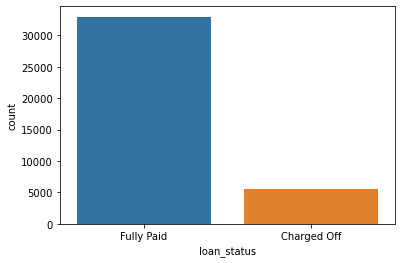

In [75]:
#let us walk through all columns one-at-a-time
#Loan Status
sns.countplot(df.loan_status)
plt.title("CountPlot for LoanStatus")

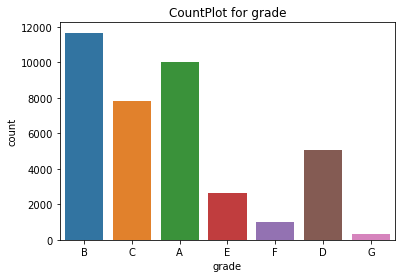

In [95]:
sns.countplot(df.grade)
plt.title("CountPlot for grade")
plt.show()

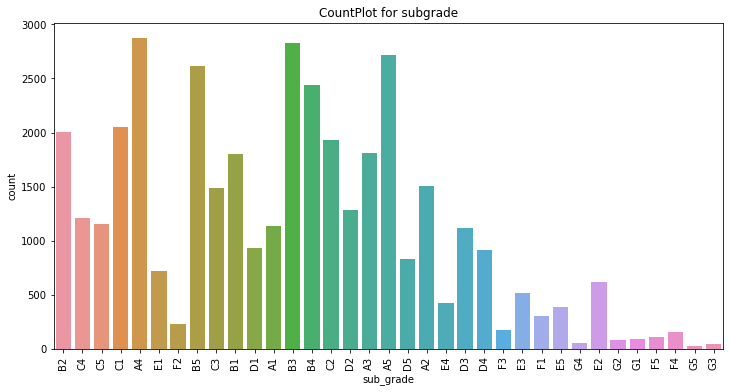

In [96]:
plt.figure(figsize=(12,6))
sns.countplot(df.sub_grade)
plt.title("CountPlot for subgrade")
plt.xticks(rotation=90)
plt.show()

In [107]:
# It can be noticed that the sub_grade values have a quantifier at the end, for eg, A1=,B2=2, 
#creating a dictionary to map these values 
subgradeDict={k:k[-1] for k in df.sub_grade}
subgradeDict
subgradeArray=np.array(list(subgradeDict.values()))
#It appears that adding these to dictionary will not work as dictionary has unique keys, so we created another column 
# "sub_grade_rank" in the Data Cleaning section


<AxesSubplot:xlabel='grade', ylabel='count'>

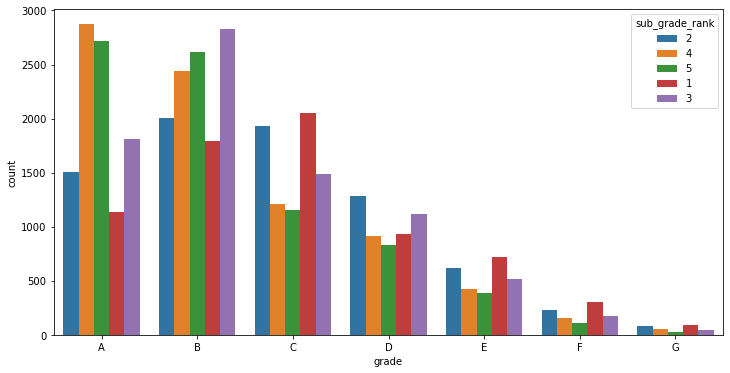

In [112]:
#creating another count plot with sub_grade and sub_grade_rank
plt.figure(figsize=(12,6))
sns.countplot(x='grade',order=['A','B','C','D','E','F','G'],hue="sub_grade_rank",data=df)

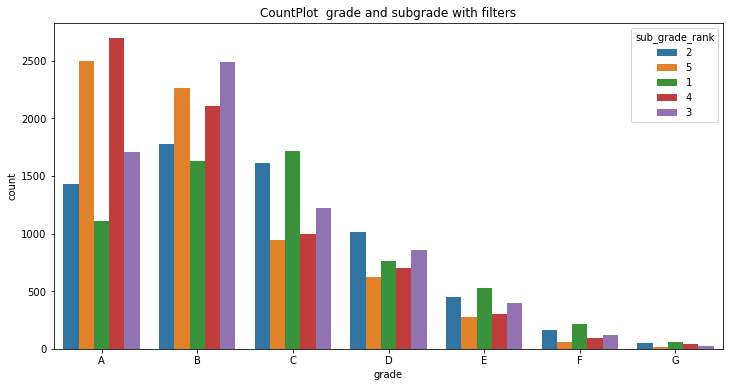

In [123]:
plt.figure(figsize=(12,6))
sns.countplot(x='grade',order=['A','B','C','D','E','F','G'],hue="sub_grade_rank",data=df[df.loan_status=="Fully Paid"])
plt.title("CountPlot  grade and subgrade with filters")
plt.show()

<AxesSubplot:xlabel='grade', ylabel='count'>

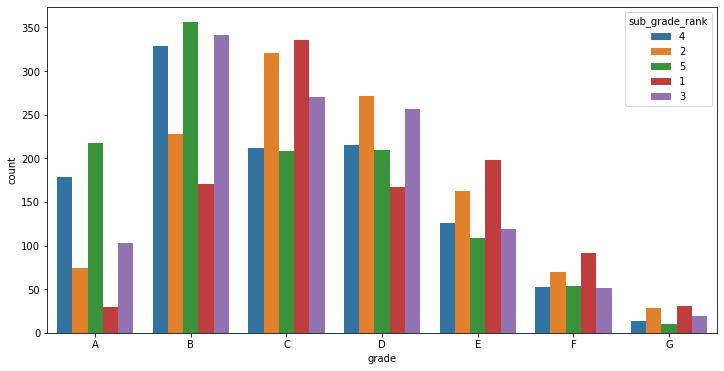

In [121]:
plt.figure(figsize=(12,6))
sns.countplot(x='grade',order=['A','B','C','D','E','F','G'],hue="sub_grade_rank",data=df[df.loan_status=="Charged Off"])
plt.title("CountPlot for grade and subgrade with filters")
plt.show()